<a href="https://colab.research.google.com/github/EmmanuelRamosSull/BaseDatosRelacionales/blob/main/Tarea4-FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys

sys.path.append('/content/HeartAttack.py')
from HeartAttack import *

heart_df = HeartAttackHelper.obtainHearthDF()

display(Markdown(heart_df.head().to_markdown()))

|    |   age |   sex |   cp |   trtbps |   chol |   fbs |   restecg |   thalachh |   exng |   oldpeak |   slp |   caa |   thall |   output |
|---:|------:|------:|-----:|---------:|-------:|------:|----------:|-----------:|-------:|----------:|------:|------:|--------:|---------:|
|  0 |    63 |     1 |    3 |      145 |    233 |     1 |         0 |        150 |      0 |       2.3 |     0 |     0 |       1 |        1 |
|  1 |    37 |     1 |    2 |      130 |    250 |     0 |         1 |        187 |      0 |       3.5 |     0 |     0 |       2 |        1 |
|  2 |    41 |     0 |    1 |      130 |    204 |     0 |         0 |        172 |      0 |       1.4 |     2 |     0 |       2 |        1 |
|  3 |    56 |     1 |    1 |      120 |    236 |     0 |         1 |        178 |      0 |       0.8 |     2 |     0 |       2 |        1 |
|  4 |    57 |     0 |    0 |      120 |    354 |     0 |         1 |        163 |      1 |       0.6 |     2 |     0 |       2 |        1 |

# Selección de características

Para esta sección se buscará realizar comparativas de diferentes tipos de modelos de selección de características a fin de encontrar el que tenga mejor desempeño y explique nuestras variables,  Para nuestros datos la variable de respuesta es la variable **output**. 

## Anova F-value







In [3]:
from sklearn.feature_selection import f_classif


##Dividimos el DF original en dos partes las variables predictivas y la de respuesta
y = heart_df['output']
columns_expect_output = [ i for i in heart_df.columns if i != 'output'];
x = heart_df[columns_expect_output]
f_value = f_classif(x , y)

##Obtenemos el valor de f de cada una de las variables

pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])


age 7.524801303436258e-05
sex 6.67869211531398e-07
cp 2.4697121089225036e-15
trtbps 0.011546059200245085
chol 0.13879032695589122
fbs 0.6267775474340704
restecg 0.016839897060127233
thalachh 1.6973376386571653e-14
exng 1.5208138383314494e-15
oldpeak 4.085346391354478e-15
slp 6.10161061956552e-10
caa 1.4915387381121373e-12
thall 7.624879909573069e-10


In [4]:
# Se ordenan variables por su f-value
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
exng,70.952438
cp,69.772271
oldpeak,68.551439
thalachh,65.120104
caa,54.559834
slp,40.902071
thall,40.407696
sex,25.792191
age,16.116700
trtbps,6.458169


Resultados gráficos de cada una de las variables.

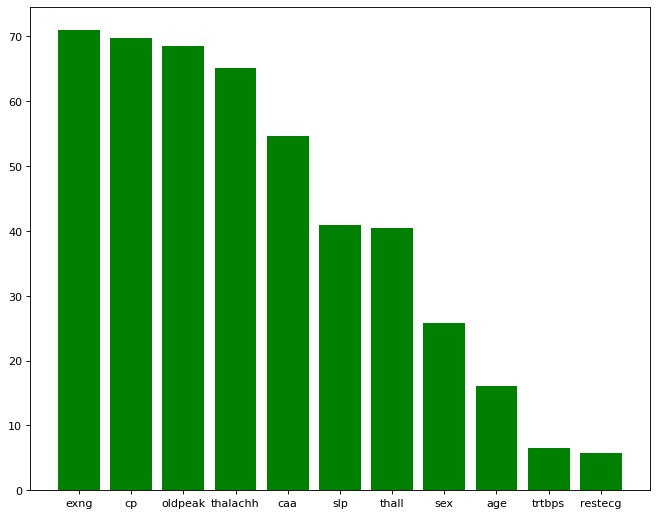

In [5]:
plt.figure(figsize=(10, 8), dpi=80)
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value, color= 'green')
plt.show()

De acuerdo con los estudios clínicos realizados la angina de pecho inducida por ejercicio es un problema muy común, link de estudio abajo sugiere que la angina de pecho inducida por ejercicio en un ambiente frio es mas frecuente en ambiente frios. 
Lo cual lo hace sentido como un buen indicador para nuestra variable de respuesta.
La segunda variable 
Procederemos a analizar los siguientes metodos y ver si similtudes.

[Exercising in the cold](https://pubmed.ncbi.nlm.nih.gov/4068968/#:~:text=Exercise%2Dinduced%20angina%20(AP),when%20exercising%20in%20the%20cold.)

## Umbral de varianza

Modelo el cual se encarga de descartar variables con una **varianza baja**.

In [6]:
## Aplicamos transformacion de datos normalizando variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [7]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.03568244, 0.21644937, 0.11795745, 0.02728474, 0.01395697,
       0.12645819, 0.06890392, 0.03047112, 0.21997843, 0.03495437,
       0.09462035, 0.06514203, 0.04151614])

In [8]:
df_results['variance'] = selector.variances_
df_results.sort_values('variance', ascending = False, inplace = True)
df_results

,f_value,variance
age,16.116700,0.219978
cp,69.772271,0.216449
slp,40.902071,0.126458
oldpeak,68.551439,0.117957
restecg,5.777209,0.094620
thall,40.407696,0.068904
chol,2.202983,0.065142
fbs,0.236942,0.041516
exng,70.952438,0.035682
trtbps,6.458169,0.034954


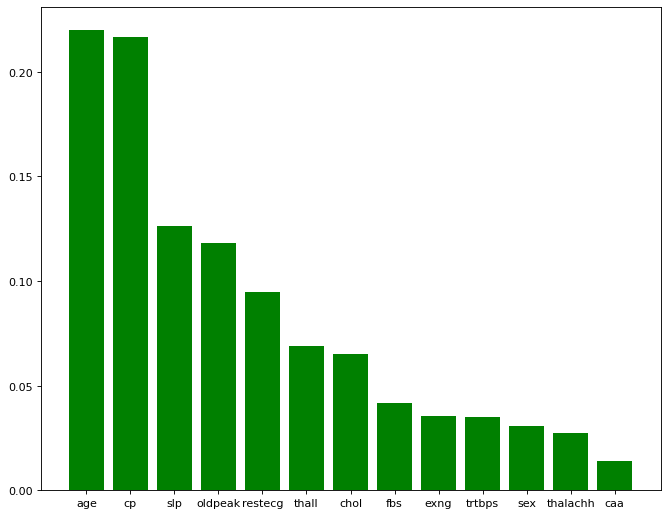

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
plt.bar(df_results.index, df_results.variance, color='green')
plt.show()

En la grafica anterior el umbral de varianza nos arroja la edad como primera que captura una mayor varianza, **se realizó una búsqueda sobre un estudio clínico y _actualmente no existe diferencia alguna en la angina de pecho para un hombre como para la mujer, solo se encontró que el dolor suele ser un poco diferente ya sea hombre o mujer_**

[Angina in woman can be different](https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain/angina-in-women-can-be-different-than-men)

## RFE - Eliminación de características recursivo


Recursive Feature Elimination or RFE, es un método para seleccionar características al recursivamente considerar pequeños conjuntos de características.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


#Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 4, step = 1)
rfe_selector.fit(x, y)
x.columns[rfe_selector.get_support()]

Index(['sex', 'exng', 'slp', 'thall'], dtype='object')

Las 4 características que arrojo este método fueron **sex, exng slp thall**

Las primeras dos variables ya se habían analizados en los métodos anteriores, solo slp y thall no se revisaron. La variable slp o ‘slope’ tiene una relación a pruebas de ejercicio con electrocardiogramas en caso de que surja una anomalía o el paciente indique algún tipo de fatiga la prueba se detiene, con respecto a thall o ‘thallasemia’ este es un desorden crónico a nivel hemoglobina que causa que tu cuerpo tenga menos hemoglobina de la normal, hemoglobina habilita a los glóbulos rojos a llevar oxígeno, la talasemia puede producir anemia o fatiga, existen estudios de **cardiopatías de β-Thalassemia**, con respecto al método ejecutado tiene mucho sentido que estas 2 variables este muy relacionadas con nuestra variable de respuesta.


[Thalassemia](https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995#:~:text=Anemia%20can%20both%20slow%20a,be%20associated%20with%20severe%20thalassemia.)

[β-Thalassemia Cardiomyopathy](https://www.ahajournals.org/doi/full/10.1161/CIRCHEARTFAILURE.109.913863#:~:text=The%20%CE%B2%2Dthalassemia%20cardiomyopathy%20is,hypertension%2C%20and%20right%20heart%20failure.)

[Exercise tolerance testing 'slope'](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/)


## Información mutua

Para el modelo de informacion mutua este modelo medira la dependencia entre variables, un valor 0 indica independencia de variables.




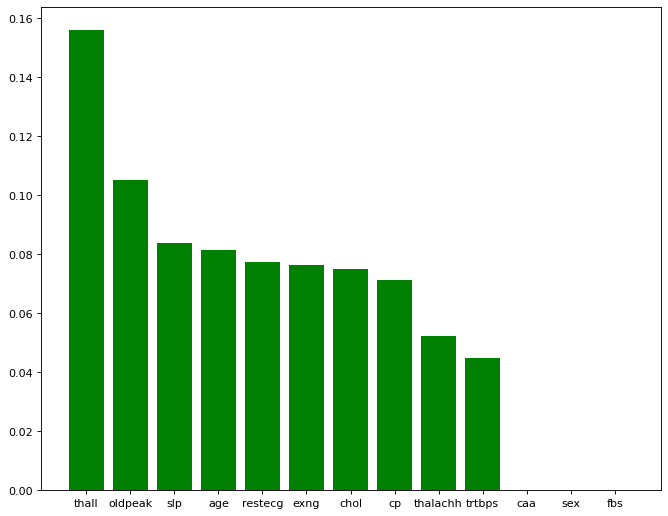

In [12]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(x, y, random_state=0)
mi
df_results['mi'] = mi
df_results.sort_values('mi', ascending = False, inplace = True)
plt.figure(figsize=(10, 8), dpi=80)
plt.bar(df_results.index, df_results.mi, color='green')
plt.show()

La variable diferente en este modelo mostrada aquí en las principales es ‘oldpeak’ esta variable está relacionada a el **ST-segmento** en un electrocardiograma el cual detecta anomalías dentro del electrocardiograma. 

[ST Segment](https://www.ncbi.nlm.nih.gov/books/NBK459364/#:~:text=ST%20depression%20occurs%20when%20the,and%20medications%20such%20as%20digitalis.)

## Selección de características exhaustiva

Este modelo de Selección de características exhaustiva o EFS evalúa todas las combinaciones de características y devuelve los valores que optimizan el modelo.
Para este modelo se usará KNeighbors para clasificación.




In [25]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import mlxtend
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(x, y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Features: 1092/1092

In [28]:
metric_dict = efs1.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
881,"(2, 10, 11, 12)","[0.8688524590163934, 0.8852459016393442, 0.819...",0.828087,"(cp, slp, caa, thall)",0.068025,0.052926,0.026463
1090,"(8, 10, 11, 12)","[0.8688524590163934, 0.8524590163934426, 0.836...",0.811475,"(exng, slp, caa, thall)",0.067255,0.052327,0.026163
1091,"(9, 10, 11, 12)","[0.819672131147541, 0.8852459016393442, 0.7868...",0.805027,"(oldpeak, slp, caa, thall)",0.058836,0.045776,0.022888
878,"(2, 9, 10, 11)","[0.8032786885245902, 0.8360655737704918, 0.786...",0.798579,"(cp, oldpeak, slp, caa)",0.07252,0.056423,0.028212
256,"(2, 11, 12)","[0.8524590163934426, 0.9016393442622951, 0.737...",0.798361,"(cp, caa, thall)",0.089366,0.06953,0.034765
873,"(2, 8, 9, 11)","[0.7704918032786885, 0.8032786885245902, 0.803...",0.79541,"(cp, exng, oldpeak, caa)",0.031531,0.024532,0.012266
880,"(2, 9, 11, 12)","[0.819672131147541, 0.8524590163934426, 0.7540...",0.795246,"(cp, oldpeak, caa, thall)",0.057062,0.044396,0.022198
1089,"(8, 9, 11, 12)","[0.7868852459016393, 0.8360655737704918, 0.770...",0.792022,"(exng, oldpeak, caa, thall)",0.039836,0.030993,0.015497
375,"(9, 11, 12)","[0.8032786885245902, 0.8524590163934426, 0.770...",0.791913,"(oldpeak, caa, thall)",0.050605,0.039372,0.019686
877,"(2, 8, 11, 12)","[0.7868852459016393, 0.8688524590163934, 0.786...",0.791858,"(cp, exng, caa, thall)",0.055952,0.043533,0.021766


**Observaciones**: con un 85% de accuracy el primer renglon del DataFrame toma las ya conocidas variables que revisamos en cada uno de los modelos **cp, slp, caa y thall** , la primera y tercer variable no aparecio dentro de los anteriores modelos, este modelo incluyo una de las caracteristicas la cual es muy importante la cual es **cp**, '_tipo de angina de pecho_'  la cual esta dividida en varias categorias:

0. typical angina

1. atypical angina

2. non-anginal pain

3. asymptomatic

La siguiente variable no incluida fue **caa** o '_number of mayor vessels floured by colored by fluoroscopy_' la cual es un estudio realizado para deteccion de affeciones coronarias.

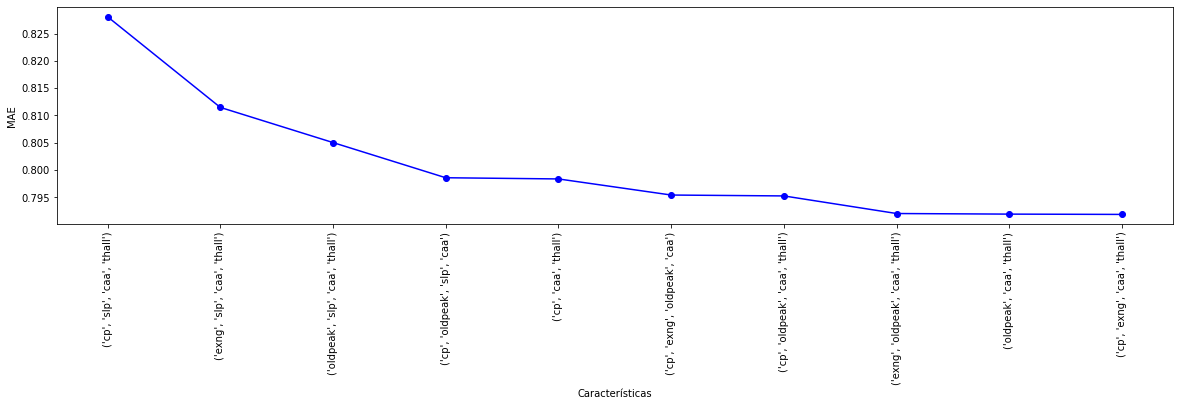

In [29]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_efs_best_10.feature_names.astype(str), 
    df_efs_best_10.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

## PCA

El análisis de componentes principales es una especie de técnica de reducción de características que podría utilizarse como selección de características. Consiste en reducir la dimensionalidad de características mediante hiperparámetros que incluyan las características que más varianza tengan para explicar un modelo.



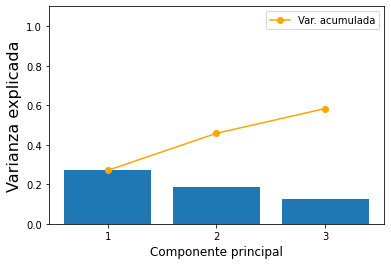

In [30]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components = 3)
pca_model = pca.fit(x_scaled)
plt.figure()
plt.bar(np.arange(pca_model.n_components_) + 1, pca_model.explained_variance_ratio_)
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(range(1, 4),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca_model.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [31]:
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index = ['pca1', 'pca2', 'pca3']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3
exng,0.755026,0.335511,-0.017662
sex,0.419823,-0.890548,-0.081817
oldpeak,0.146038,0.052726,0.079872
caa,0.124711,-0.014928,0.157091
thall,0.123855,-0.040201,-0.027898
age,0.048114,0.083154,0.138499
fbs,0.037647,-0.073695,0.890368
trtbps,0.020800,0.035236,0.133634
chol,0.002557,0.062751,0.020950
restecg,-0.064966,0.006820,-0.139510


In [33]:
formula = ''
for i, r in pca_coef.iterrows():
    formula = formula +  str(round(r.pca1, 4)) + ' \text{' + i + '} + '
formula

'0.75503 \text{exng} + 0.41982 \text{sex} + 0.14604 \text{oldpeak} + 0.12471 \text{caa} + 0.12386 \text{thall} + 0.04811 \text{age} + 0.03765 \text{fbs} + 0.0208 \text{trtbps} + 0.00256 \text{chol} + -0.06497 \text{restecg} + -0.15007 \text{thalachh} + -0.22488 \text{slp} + -0.34638 \text{cp} + '

$PCA_1 = 0.7550 * exng + 0.4198 * sex + 0.1460 * oldpeak + 0.1247 * caa

**Resumen**:

A continuación se agregara las primera 4 variables de cada uno de los  modelos con el fin de comparar similitudes y basados en la teoría y análisis clínicos determinar cuales variables son importantes a considerar y cuales no estuvieron presentes a pesar de tener información útil.


\begin{array}{ccc}
\text{Modelo}&\text{Variable}&\text{Variables presentes en Análisis clínicos}\\
Anova F-value&exgn, cp, thalla, oldpeak & si \\ Umbral de varianza & age, cp, oldpeak,	slp	& si \\ RFE & sex,exng,slp,thall & si \\ Información mutua & thall, oldpeak, slp, age & si \\ Seleccion de caracteristicas exhaustiva & cp, slp, caa , thall & si \\ PCA & PCA_1 = 0.7550 * exng + 0.4198 * sex + 0.1460 * oldpeak + 0.1247 * caa  & si
\end{array}

Conclusiones: Basado en la tabla anterior se pueden ver similitudes en la selección de variables, en los cuales algunos modelos tuvieron un buen desempeño de predicción en nuestra variable de respuesta.

Las variables que consideramos tanto por estar presentes en los modelos así como en los estudios clínicos que se encontraron eran muy importantes para la detección de afecciones cardiacas o detección de alguna anomalías son:
**cp, exng, slp, thall, caa, trtbps**

Dos de las variables que aparecieron en algunos de los modelos y no se consideran 
son **age** y **sex**, para el caso de la variable **age** (Edad), esta no influye ya que estudios han confirmado que existen registros de personas jóvenes las cuales tienen ataques al corazón esto por diversos factores y hábitos tales como fumar , alimentación etc..

Para la variable **sex** la informacion y el estudio clinico se anexo en la seccion del modelo **RFE**


Anexo links con informacion extra:

[Young people heart attacks](https://www.cminj.com/blog/whats-behind-the-rise-in-heart-attacks-among-young-people#:~:text=Now%201%20in%205%20heart,in%20this%20young%20age%20group.)

[Data dictionary](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/329925?search=slope+of+the+peak+exercise)

[ST-Segment](https://litfl.com/st-segment-ecg-library/)

[Thallium Stress test](https://www.healthline.com/health/thallium-stress-test#procedure)

[ECG](http://es.heart.erasmusnursing.net/content/2-0-fisiologia-cardiaca/2-4-electrocardiograma-ecg/)
